<a href="https://colab.research.google.com/github/alexander-toschev/mbzuai-course/blob/main/ImageProperties.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Resolution: 400x400
Aspect Ratio: 1.00
Color Depth: uint8


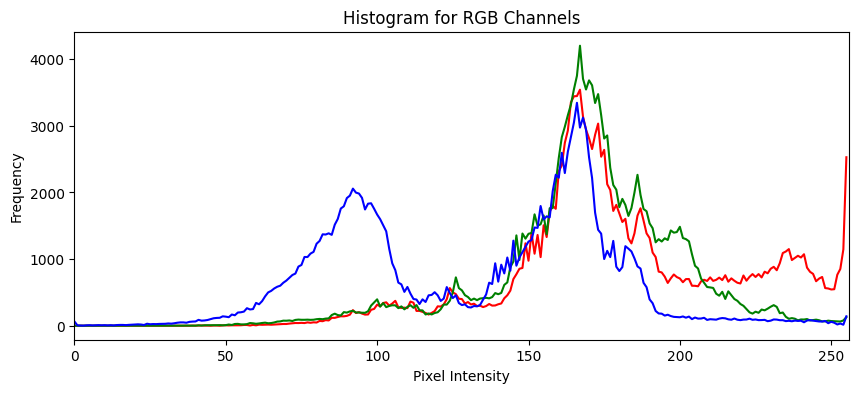

Estimated Noise Level (Std Dev): 29.30


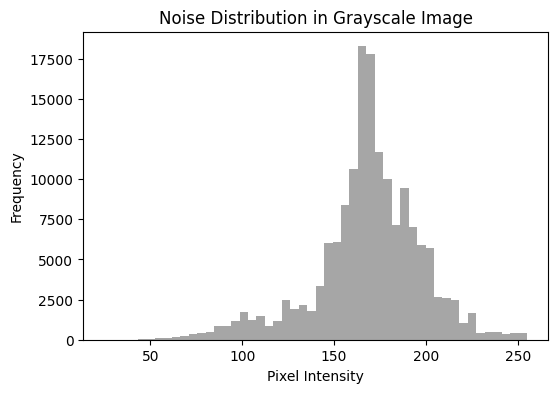

Estimated Noise Level (Std Dev): 29.30


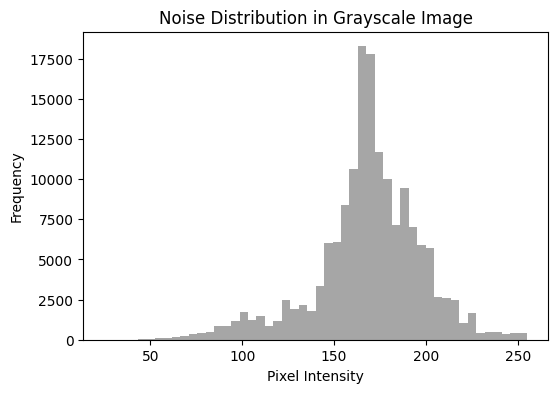

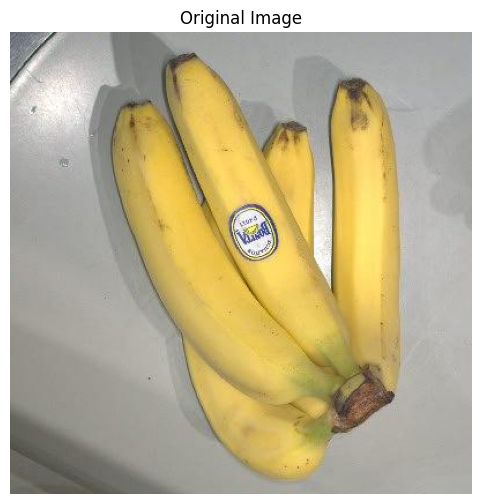

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure
import requests
from io import BytesIO
from PIL import Image

# Function to download image from URL
def download_image(url):
    response = requests.get(url)
    image = Image.open(BytesIO(response.content))
    image = image.convert('RGB')
    image.save("downloaded_image.jpg")
    return cv2.imread("downloaded_image.jpg")

# Load an example image
image_url = "https://github.com/alexander-toschev/mbzuai-course/blob/main/images/Banana1.jpg?raw=true"
image = download_image(image_url)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Function to compute image characteristics
def compute_image_characteristics(image):
    height, width, channels = image.shape
    aspect_ratio = width / height
    color_depth = image.dtype

    print(f"Resolution: {width}x{height}")
    print(f"Aspect Ratio: {aspect_ratio:.2f}")
    print(f"Color Depth: {color_depth}")

    return height, width, aspect_ratio, color_depth

# Compute and display characteristics
compute_image_characteristics(image)

# Compute and display histogram for dynamic range analysis
def plot_histogram(image_rgb):
    plt.figure(figsize=(10, 4))
    colors = ('r', 'g', 'b')
    for i, color in enumerate(colors):
        hist = cv2.calcHist([image_rgb], [i], None, [256], [0, 256])
        plt.plot(hist, color=color)
        plt.xlim([0, 256])
    plt.title("Histogram for RGB Channels")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.show()

plot_histogram(image_rgb)


# Function to compute noise level
def compute_noise(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    noise_std = np.std(gray)
    print(f"Estimated Noise Level (Std Dev): {noise_std:.2f}")

    # Display noise level graphically
    plt.figure(figsize=(6,4))
    plt.hist(gray.ravel(), bins=50, color='gray', alpha=0.7)
    plt.title("Noise Distribution in Grayscale Image")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.show()

compute_noise(image)

#Noise level in an image refers to the amount of unwanted variations in pixel intensity, often caused by sensor limitations, compression artifacts, or environmental factors (e.g., low-light conditions).

#How Do We Measure Noise Level?
#One common way to estimate noise in an image is by computing the standard deviation of pixel intensities in the grayscale version of the image:

# Show original image
plt.figure(figsize=(6, 6))
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")
plt.show()


### **Understanding the Results of the Computation**

Your code analyzes several **image characteristics**, and here’s how to interpret the outputs:

---

### **1. Resolution, Aspect Ratio, and Color Depth**
#### **Output Example:**
```
Resolution: 1920x1080
Aspect Ratio: 1.78
Color Depth: uint8
```
#### **What It Means:**
- **Resolution:** The width and height of the image in pixels (e.g., 1920x1080 means Full HD resolution).
- **Aspect Ratio:** Width divided by height. A **1.78** aspect ratio (≈16:9) is standard for screens.
- **Color Depth:** If `uint8`, the image uses **8 bits per channel (256 levels per color)**.

---

### **2. RGB Histogram Analysis**
#### **Graph Output:**  
A **histogram with three curves (Red, Green, and Blue)** shows the pixel intensity distribution.

#### **How to Interpret:**
- **Broad and evenly distributed peaks** → Well-balanced contrast.
- **Skewed towards 0 (left)** → The image is too dark.
- **Skewed towards 255 (right)** → The image is too bright.
- **Peaks concentrated in one place** → Low contrast.

📌 **Use Case:** If an image has low contrast, techniques like **Histogram Equalization** can enhance visibility.

---

### **3. Noise Level Estimation**
#### **Output Example:**
```
Estimated Noise Level (Std Dev): 12.45
```
#### **Histogram Output:**  
A **grayscale pixel intensity distribution**.

#### **How to Interpret:**
- **Higher standard deviation (~>20)** → More noise (e.g., grainy images in low light).
- **Lower standard deviation (~<10)** → Smoother image, less noise.
- **Flat histogram** → Uniformly distributed intensity values (could indicate a noisy image).
- **Peaks concentrated at few values** → Low variation, possibly a clean image.

📌 **Use Case:** If noise is high, techniques like **Gaussian Blur, Median Filtering, or Non-Local Means Denoising** can be applied.

---
